## TwoAmbulanceChimeraEmbedding

This notebook aids the process of converting an adjacency table into a fully embedded problem in the Chimera or pegasus topology.

In [ ]:
#SUMMARY OF NOTEBOOK
# key functions
#is a given edge in a union(structured_sampler,  list)
def is_edge_in_structure(structured_sampler,edge_test):
    return is_in
# for display 
def get_chains_from_embedding( structured_sampler,list(c16.edges), embedding)
    return chain_edges, chain_hole_list
#find what is in graph but not in structured_sampler
def sampler_node_not_in_chimera_graph(structured_sampler,first_cross_up_down=0, last_cross_up_down=16,first_cross_left_right=0,last_cross_left_right=16):
    """
    Returns 
        qpu_focus               (type:list)   edges in the graph topology and in the selected range of the graph
        holes_in_focus          (type:list)   edges, from qpu_focus, that are not in the qpu /sampler
        nodes_not_in_sampler    (type:list)   nodes  , from qpu_focus, are not in the qpu / sampler
    """
    return qpu_focus, holes_in_focus, nodes_not_in_sampler

def is_edge_in_node_limits

def get_target_edges_from_logical( structured_sampler, embedding, Adjacency_logical):
    return edge_target_list,node_target_list
#cell sequence
#TWO AMBULANCE DISTANCE MINIMISATION - Adjacency
# key functions

In [1]:
#TWO AMBULANCE DISTANCE MINIMISATION - Adjacency

import numpy as np 
#RC utility functions    
from pyaqc.RCModules.PlatformConversion import print_QUBOdetails, CreateTwoAmbulanceAdjacencyV1,CreateTwoAmbulanceAdjacencyV2
#################################### Create Adjacency defined as a qubo ####################################
n_destinations = 3*2
gridWidth = 3# n_destinations
Width  = gridWidth
Height = n_destinations//gridWidth

result = CreateTwoAmbulanceAdjacencyV2(gridWidth,n_destinations, Adddistance = 1, ConstraintMultiplier=5, use_XYMixer_constraints=0)

Adjacency = result['qubo']
AdjacencyHybrid = result['quboHybrid']
n_qubits = result['n_qubits']
ConstraintMultiplier = result['ConstraintMultiplier']
max_distance = result['max_distance']

print(ConstraintMultiplier/max_distance ,' = ConstraintMultiplier/max_distance')
if 1:
    filename = 'Twoambulances.txt'
    
    print_QUBOdetails(Adjacency,n_qubits,filename)

1.0  = ConstraintMultiplier/max_distance
ADJACENCY MATRIX Twoambulances.txt  

Qubit  q0   q1   q2   q3   q4   q5   q6   q7   q8   q9  q10  q11  q12  q13  q14  q15  q16  q17  q18  q19  q20  q21  q22  q23 

  q0   -5                            10                                 1    4    1    2    5  

  q1        -5                            10                       1         1    2    1    2  

  q2             -5                            10                  4    1         5    2    1  

  q3                  -5                            10             1    2    5         1    4  

  q4                       -5                            10        2    1    2    1         1  

  q5                            -5                            10   5    2    1    4    1  

  q6                                 -5                                                               1    4    1    2    5  

  q7                                      -5                                              

In [63]:
# AQC embedding functions
def is_edge_in_structure(structured_sampler,edge_test):
    """
    params
        'edge_test' 
        type: tuple(int,int)  eg (q1,q2) 

        structured_sampler 
        type: list[tuple]  eg [(q1,q2),(q1,q2)]
        or type: dwave.system.dwave_sampler eg DWaveSampler(solver={'qpu': True,'topology__type': 'chimera'})
    
    return  True  if edge, or reversed(edge), is present in both 
        a) 'edges_test'  and 
        b) the structured_sampler
    type:bool
    """
    
    try:
        if type(structured_sampler) is not list:
            structured_sampler = list(structured_sampler.edgelist)
        idx = structured_sampler.index(edge_test)
        is_in = True
    except ValueError as err:
        try:
            idx = structured_sampler.index(tuple(reversed(edge_test))  )
            is_in = True
        except ValueError as err:
            is_in = False
    return  is_in     
def are_edges_in_structure(src_edges, poss_subset_edges):
    """
    params
        'poss_subset_edges' 
        type: list[tuple(int,int)]  eg [(q1,q2),(q1,q2)]

        structured_sampler 
        type: list[tuple]  eg [(q1,q2),(q1,q2)]
        or type: dwave.system.dwave_sampler eg DWaveSampler(solver={'qpu': True,'topology__type': 'chimera'})
    
    return  True  if every edge, or reversed(edge),  is present in both 
        a) 'poss_subset_edges'  and 
        b) the structured_sampler/ edge list
    type:bool
    """
    all_in = True
    for edge in poss_subset_edges:
        if not is_edge_in_structure(src_edges,edge):
            all_in = False
    return all_in
    
def is_node_in_structure(structured_sampler,node):
    is_in = True
    if type(structured_sampler) is not list:
            structured_sampler = list(structured_sampler.nodelist)
    try:
        idx = structured_sampler.index(node)        
    except ValueError as err:
        is_in = False
    return is_in
def are_nodes_in_structure(structured_sampler,nodes_to_test):
    all_in = True
    for node in nodes_to_test:
        if not is_node_in_structure(structured_sampler,node):
            all_in = False
    return all_in

def is_edge_in_node_limits(edge,first_cross_up_down=0, last_cross_up_down=16,first_cross_left_right=0,last_cross_left_right=16):
    """
    params
        first_cross_up_down     select area of Chimera topology by reference to the position of crosses (k44 s)
        last_cross_up_down
        first_cross_left_right
        last_cross_left_right

        type: int

        edge the edge to test whether it is in the selected region
        type: tuple(int,int) eg (q1,q2)
    """
    edge_0_in_limits = False
    edge_1_in_limits = False
    for row in range(first_cross_up_down, last_cross_up_down):
            start_node_v    = first_cross_left_right * 8 + row * 128
            end_node_v      = last_cross_left_right * 8 + row * 128

            if edge[0] >= start_node_v  and edge[0] < end_node_v:
                edge_0_in_limits = True
            if edge[1] >= start_node_v  and edge[0] < end_node_v:
                edge_1_in_limits = True
    return edge_0_in_limits and edge_1_in_limits

def sampler_node_not_in_chimera_graph(structured_sampler,first_cross_up_down=0, last_cross_up_down=16,first_cross_left_right=0,last_cross_left_right=16):
    """
    Returns 
        qpu_focus               edges in the graph topology and in the selected range of the graph
        type:list
        
        missing_edges_in_focus          edges, from qpu_focus, that are not in the qpu /sampler
        type:list
        
        nodes_not_in_sampler    nodes  , from qpu_focus, are not in the qpu / sampler
        type:list
    """
    qpu_focus = []              # nodes and edges in the graph topology and in the selected range of the graph
    missing_edges_in_focus = []         # edges above that are not in the qpu /sampler
    nodes_not_in_sampler = []    # nodes above that are not in the qpu / sampler

    c16 = dnx.chimera_graph(16,16)
    graph_topology = c16

    for edge in graph_topology.edges:
            # iterate through every edge in the graph_topology
        
        # Is edge withing focus limits?
        if is_edge_in_node_limits(edge,first_cross_up_down, last_cross_up_down,first_cross_left_right,last_cross_left_right):
                # Is edge, or reversed(edge), in structured_sampler 
                if is_edge_in_structure(structured_sampler,edge):
                    qpu_focus.append(edge)
                else:   
                    #Add missing edge to list
                    missing_edges_in_focus.append(edge)             
                    # Is missing edge due to a missing node?
                    if not is_node_in_structure(structured_sampler,edge[0]):
                        if not is_node_in_structure(nodes_not_in_sampler,edge[0]):
                            nodes_not_in_sampler.append(edge[0])
                
                    if not is_node_in_structure(structured_sampler,edge[1]):
                        if not is_node_in_structure(nodes_not_in_sampler,edge[1]):
                            nodes_not_in_sampler.append(edge[1])
                
    return qpu_focus, missing_edges_in_focus, nodes_not_in_sampler
def is_node_in_edge_list(src_edges,node):
    nodes_in_edge = []
    for q1,q2 in src_edges:
        nodes_in_edge.append(q1)
        nodes_in_edge.append(q2)
    return is_node_in_structure(nodes_in_edge,node)

def get_chains_from_embedding( structured_sampler, embedding, graph_topology):
    """
    return chain_edges type(list[(int,int),(int,int)]  a list of tuples each of which describes an edge of a chain
    e.g if  embedding=[chain1a,chain1b,chain1c],  returns list[(chain1a,chain1b), (chain1a,chain1c)]) if those are couplings in the structured_sampler
    params 
        structured_sampler (type:dimod.StructureComposite)
        embedding type(dict{int,[int,int]}) this represents {logical_qubit:[chain_of_target_qubits]}
    """
    #chain_list =[]
    chain_edges = []            #Chain edges needed to create the chains requested by the embedding
    chain_edges_missing =[]     # chain edges created that are in the graph_topology.edges , but not in structured_sampler.edgeslist

    chain_implemented = False
    n_chains_coupled = 0
    for chain_list in embedding.values():
        chain_edges_update = []
        chain_implemented = True
        #print(chain_list, 'chain_list')
        for nodeA in chain_list:
            #print(nodeA, 'nodeA')        
            for nodeB in chain_list:
                #print(nodeA, nodeB)
                if nodeB > nodeA:
                    chain = (nodeA, nodeB)
                    # is proposed edge in the graph
                    if is_edge_in_structure(list(graph_topology.edges), chain):
                        chain_edges_update.append(chain)
                        # if not in structured_sampler
                        if not is_edge_in_structure(structured_sampler, chain):         #this tests chain and reversed(chain)
                            # if not already in list record hole
                                if not is_edge_in_structure(chain_edges_missing, chain):
                                    chain_edges_missing.append(chain)
                        
        #if len(chain_edges_update) >0:
        for edge in chain_edges_update:
                chain_edges.append(edge)
        if not len(chain_edges_update) == len(chain_list)-1: 
            
            for node in chain_list:
                if not is_node_in_edge_list(chain_edges_update,node):
                    chain_implemented = False
                    print( 'node',node, ' in ', chain_list,' (chain_list) was not coupled',chain_edges_update)
    return chain_edges, chain_edges_missing


In [64]:
from dwave import *
from dwave.system.samplers import DWaveSampler
def test_get_chains_from_embedding():
    graph_topology = dnx.pegasus_graph(16)
    embedding = {12: [997, 4309, 4310], 13: [1012, 4294, 4295]} 
    structured_sampler = DWaveSampler(solver={'qpu': True,'topology__type': 'pegasus'})#, chains=[2,3]) 

    chain_edges,chain_edges_missing   = get_chains_from_embedding( structured_sampler, embedding, graph_topology) 
    embedding = {12: [997, 4309, 4310], 13: [1012, 4294, 4295]} 
    chain_edges   = get_chains_from_embedding( structured_sampler, embedding, graph_topology) 
    print(chain_edges,' = chain_edges')
    print( 'chain_edges_missing = ',chain_edges_missing)
test_get_chains_from_embedding()

([(997, 4309), (4309, 4310), (1012, 4294), (4294, 4295)], [])  = chain_edges
chain_edges_missing =  []


In [80]:
# INPUT DESIGN for EMBEDDING

#2) Map/embed all qubits from bqm nodes to structured_sampler node list. This is an embedding
#eg embedding = {12: [722], 13: [722+15*1], 14: [722+15*2],15:[722+15*3]}   #first 4 start positions map bqm ref to structured_sampler ref
import dimod
import dwave_networkx as dnx
from dwave.system import FixedEmbeddingComposite, LazyFixedEmbeddingComposite,EmbeddingComposite

nloc = 6

#start positions A0
move_left = 60
Start_first_a0 = 997#633 #692 
nodes_66_v_a0 = [v for v in range(Start_first_a0,Start_first_a0+15*6,15)]   # horizontal row of 6 nodes, the index of sequential nodes differs by 15
embedding = {idx+ nloc * 2:[qubit_target] for idx, qubit_target in enumerate(nodes_66_v_a0)}
#print(embedding_start)

#destination positions A0
des_first_a0 = 4325 #3423 #3363-1
nodes_66_h_a0 = [v for v in range(des_first_a0,des_first_a0+15*6,15)] #[v for v in range(3363,3363+15*6,15)]                       # vertical row of 6 nodes
embedding.update( {idx+ nloc * 0:[qubit_target] for idx, qubit_target in enumerate(nodes_66_h_a0)})

#start positions A1
Start_first_a1 = Start_first_a0 + 180 #814 #872 
nodes_66_v_a1 = [v for v in range(Start_first_a1,Start_first_a1+15*6,15)]
embedding.update( {idx+ nloc * 3:[qubit_target] for idx, qubit_target in enumerate(nodes_66_v_a1)} )

#destination positions A1
des_first_a1 = des_first_a0 +1
nodes_66_h_a1 = [v for v in range(des_first_a1,des_first_a1+15*6,15)]   #[v for v in range(3364,3364+15*6,15)]
embedding.update( {idx+ nloc * 1:[qubit_target] for idx, qubit_target in enumerate(nodes_66_h_a1)} )

#CHAINS
# chains used by a0 (6 extra variables inc 2 with 3 in chains)
embedding[12].append(des_first_a0 - 90 + 15*5-1)  #des_first_a0 - 90 + 15*5 = 3348
embedding[12].append(des_first_a0 - 90 + 15*5)

embedding[13].append(des_first_a0 - 90 + 15*4-1)      # des_first_a0 - 90 + 15*3 =3333
embedding[13].append(des_first_a0 - 90 + 15*4 )
embedding[14] = [Start_first_a0+15*2,des_first_a0 - 90 + 15] #[722,3288]      des_first_a0 - 90 + 15   3288
embedding[15] = [Start_first_a0+15*3,des_first_a0 - 90 ] #[737,3273]      des_first_a0 - 90  = 3273
# chains used by a1 (8 extra variables inc 2 with 3 in chains)
embedding[18]=  [Start_first_a1,des_first_a1 + 15*6]       #des_first_a1 + 15*6 = 3454
embedding[19] = [Start_first_a1 +15,des_first_a1 + 15*7 ]       # 3469
embedding[20] = [Start_first_a1 +15*2,des_first_a1-90+15,Start_first_a1 +15*2+1]
embedding[21] = [Start_first_a1 +15*3,des_first_a1-90,Start_first_a1 +15*3+1] #[917,3274,918] #des_first_a1-90 = 3274
embedding[22] = [Start_first_a1 +15*4,Start_first_a1 +15*4+1] # [932,933]
embedding[23] = [Start_first_a1 +15*5,Start_first_a1 +15*5+1] #[947,948]
# TOTAL (14 extra variables inc 4 with 3 in chains) vs one CompositeEmbedding, 17 inc 2 in 3 chains
#{12:[692,3348,3349], 13:[707,3333,3334]}

# From embedding DISPLAY the chains on a graph by creating the edges that make up the chain.
import dwave_networkx as dnx
import dimod
from tabu import TabuSampler                                               

from dwave.system.samplers import DWaveSampler
# Structured_sampler with some 'missing edges and nodes'
topology = 'p'
c16 = dnx.chimera_graph(16,16)
p16 = dnx.pegasus_graph(16)
if topology == 'c':
    
    structured_sampler = DWaveSampler(solver={'qpu': True,'topology__type': 'chimera'})#, chains=[2,3])  
    graph = c16 
else:
    structured_sampler = DWaveSampler(solver={'qpu': True,'topology__type': 'pegasus'})#, chains=[2,3])                      
    graph = p16
#################     Create the chain edges: from the embedding. then use the structured_sampler to verify that those edges exist in the structure #################

chains = [[692, 3348,3349], [707, 3348] ]
#chains = [692, 3349]
#embedding = {12: [897, 4309, 4310], 13: [1012, 4294, 4295]}
chain_edges, chain_edges_missing   = get_chains_from_embedding( structured_sampler, embedding,graph) 

print('chain_edges   = ',chain_edges)
print('embedding = ',embedding)
print('chain_edges_missing = ',chain_edges_missing)

chain_edges   =  [(997, 4309), (4309, 4310), (1012, 4294), (4294, 4295), (1027, 4250), (1042, 4235), (1177, 4416), (1192, 4431), (1207, 4251), (1207, 1208), (1222, 4236), (1222, 1223), (1237, 1238), (1252, 1253)]
embedding =  {12: [997, 4309, 4310], 13: [1012, 4294, 4295], 14: [1027, 4250], 15: [1042, 4235], 16: [1057], 17: [1072], 0: [4325], 1: [4340], 2: [4355], 3: [4370], 4: [4385], 5: [4400], 18: [1177, 4416], 19: [1192, 4431], 20: [1207, 4251, 1208], 21: [1222, 4236, 1223], 22: [1237, 1238], 23: [1252, 1253], 6: [4326], 7: [4341], 8: [4356], 9: [4371], 10: [4386], 11: [4401]}
chain_edges_missing =  []


In [66]:
print(are_edges_in_structure(structured_sampler, chain_edges),' Chains proposed are in the structured_sampler' ) 
print(nodes_66_h_a0, '= start_A0 nodes')
print(nodes_66_v_a0,'= des_A0 nodes')
print(are_nodes_in_structure(structured_sampler,nodes_66_h_a0 + nodes_66_v_a0), 'A0 Nodes proposed are in the structured_sampler' )
print(nodes_66_h_a1,'= start_A1 nodes', nodes_66_v_a1,'= des_A1 nodes')
print(are_nodes_in_structure(structured_sampler,nodes_66_h_a1 + nodes_66_v_a1 ), 'A1 Nodes proposed are in the structured_sampler' )

#Create qubo from this embedding

True  Chains proposed are in the structured_sampler
[4325, 4340, 4355, 4370, 4385, 4400] = start_A0 nodes
[997, 1012, 1027, 1042, 1057, 1072] = des_A0 nodes
True A0 Nodes proposed are in the structured_sampler
[4326, 4341, 4356, 4371, 4386, 4401] = start_A1 nodes [1177, 1192, 1207, 1222, 1237, 1252] = des_A1 nodes
True A1 Nodes proposed are in the structured_sampler


In [ ]:
def get_target_edges_from_logicalold( structured_sampler, embedding, Adjacency_logical):
    """
    Convert Adjacency_logical list of logical qubit edges, to target qubit edges. This uses the chains in the embedding to successfully implement every edge between logical nodes. 
    Return edge_target_list, type(list(tuple(int,int), tuple(int,int)))'  e.g [(q1,q2), (q4,q12)] where qn is the nth target qubit

    Typically edge_target_list is used to display the edges in a graph, eg a Pegasus topology graph
    params
        embedding       eg embedding = {12:[692,3348,3349], 13:[707,3333,3334]}
        Adjacency_logical eg {(0, 0): -5, (0, 6): 10, (0, 13): 1} where -5,10, and 1 are edge strengths
    """
    edge_target_list = []
    edge_target =(0,0)
    all_edges_mapped = True
    
    for (q1,q2) in Adjacency_logical.keys():                                            # for each successive logical edge
        if q1 < q2:                 
            edge_fnd = False
            #print(q1,q2)
            if 1:#(len(embedding[q1]) > 1 or len(embedding[q2]) > 1):              # select edges where at least one logical qubits has a chain
                edge_fnd = False
                
                for target_q1 in embedding[q1]:
                    for target_q2 in embedding[q2]:                           
                        # compare each permutation of target_q2 and target_q1 for an edge between them in the structure
                        if (    is_edge_in_structure(structured_sampler, (target_q1, target_q2)) or \
                                is_edge_in_structure(structured_sampler, (target_q2, target_q1))    ) and \
                            edge_fnd == False:                          # pick the first edge possible between the two chains
                            
                            edge_target = (target_q1,  target_q2)
                            edge_target_list.append(edge_target)
                            #print(target_q1,  target_q2, ' ) edge is in the structure')
                            edge_fnd = True
            #print(edge_fnd ,' = edge_fnd ',edge_target, q1,q2, 'chains: ',embedding[q1],embedding[q2])
            if edge_fnd == False:
                all_edges_mapped = False
                print(all_edges_mapped, 'all_edges_mapped except', q1,q2)
    return edge_target_list


In [83]:
# Create 'edge_target_list', all the edges (logical and chain): DISPLAY purposes
def get_target_edges_from_logical( structured_sampler, graph, embedding, Adjacency_logical):
    """
    Convert Adjacency_logical list of logical qubit edges, to target qubit edges. This uses the chains in the embedding to successfully implement every edge between logical nodes. 
    Return edge_target_list, type(list(tuple(int,int), tuple(int,int)))'  e.g [(q1,q2), (q4,q12)] where qn is the nth target qubit

    Typically edge_target_list is used to display the edges in a graph, eg a Pegasus topology graph
    params
        embedding       eg embedding = {0:[692,3348,3349], 13:[707,3333,3334]}
        Adjacency_logical eg {(0, 1): -5, (0, 6): 10, (0, 13): 1} where -5,10, and 1 are edge strengths
    """
    edge_target_list = []
    edge_missing_list = []
    node_target_list = []
    node_missing_list = []
    edge_target =(0,0)
    all_edges_mapped = True
    
    for (q1,q2) in Adjacency_logical.keys():                                            # for each successive logical edge
        if q1 < q2:                 
            edge_fnd = False
            for target_q1 in embedding[q1]:
                for target_q2 in embedding[q2]:                           
                    #compare each permutation of target_q2 and target_q1 for an edge between them in the graph, and then the structure
                    edge_target = (target_q1,  target_q2)
                    #print('1')
                    if is_edge_in_structure(list(graph.edges), edge_target)  and \
                                            edge_fnd == False:                          # pick the first edge possible between the two chains
                        #print('2')
                        edge_target_list.append(edge_target)  
                        edge_fnd = True
                        if not is_node_in_structure(node_target_list,target_q1):
                            node_target_list.append(target_q1)
                        if not is_node_in_structure(node_target_list,target_q2):
                            node_target_list.append(target_q2)
                        #if edge is not in structured_sampler
                        if not is_edge_in_structure(structured_sampler, edge_target): 
                            edge_missing_list.append(edge_target)  
                        #print(target_q1,  target_q2, ' ) edge is in the structure')
                        
            #print(edge_fnd ,' = edge_fnd ',edge_target, q1,q2, 'chains: ',embedding[q1],embedding[q2])
            if edge_fnd == False:
                all_edges_mapped = False
                #print(all_edges_mapped, 'all_edges_mapped except', q1,q2)
    return edge_target_list, node_target_list,edge_missing_list
# Generate target edges from embedding and Adjacency and highlight failed edges (ie not in the Pegasus structure)
Adjacencytest = {(18,20):2}
#Adjacencytest.update({(0,6):2})
Adjacencytest = Adjacency
edge_target_list,node_target_list,edge_missing_list = get_target_edges_from_logical( structured_sampler, graph, embedding,  Adjacencytest)
print( 'edge_target_list \n', edge_target_list)
#edge_target_list.append( (722,723))

edge_target_list 
 [(4325, 4326), (4325, 1012), (4325, 1027), (4325, 1042), (4325, 1057), (4325, 1072), (4340, 4341), (4340, 997), (4340, 1027), (4340, 1042), (4340, 1057), (4340, 1072), (4355, 4356), (4355, 997), (4355, 1012), (4355, 1042), (4355, 1057), (4355, 1072), (4370, 4371), (4370, 997), (4370, 1012), (4370, 1027), (4370, 1057), (4370, 1072), (4385, 4386), (4385, 997), (4385, 1012), (4385, 1027), (4385, 1042), (4385, 1072), (4400, 4401), (4400, 997), (4400, 1012), (4400, 1027), (4400, 1042), (4400, 1057), (4326, 1192), (4326, 1207), (4326, 1222), (4326, 1237), (4326, 1252), (4341, 1177), (4341, 1207), (4341, 1222), (4341, 1237), (4341, 1252), (4356, 1177), (4356, 1192), (4356, 1222), (4356, 1237), (4356, 1252), (4371, 1177), (4371, 1192), (4371, 1207), (4371, 1237), (4371, 1252), (4386, 1177), (4386, 1192), (4386, 1207), (4386, 1222), (4386, 1252), (4401, 1177), (4401, 1192), (4401, 1207), (4401, 1222), (4401, 1237), (997, 1012), (4309, 1027), (4309, 1042), (4310, 1057), (4310,

In [ ]:
#is the ABOVE the same as creating a target_bqm and then list edges with target_bqm.quadratic

In [ ]:
# DIAGNOSE

from dwave.embedding import verify_embedding, diagnose_embedding
embedding_list = embedding
#introduce an error
embedding_list[12][2]=997
#correct it
if 0: embedding_list[12] = [997, 4309, 4310]

target_graph = dnx.pegasus_graph(16) 
edge_src_list = list(Adjacency.keys() )
diagnosis = diagnose_embedding(embedding_list, edge_src_list,target_graph,)

for problem in diagnosis:  
    print(problem)

In [ ]:
#DEBUG cell
# test ONE logical edge is 1) in Adjacency, 2) is mapped to a target in P(16), 3) is a valid edge in the target structure
(q1_logical,q2_logical) = 2,17
########################### 1) in Adjacency
print('Logical edge', (q1_logical,q2_logical))
try: 
    Adjacency[(q1_logical,q2_logical)]
    print('   ...  IS in Adjacency')
except KeyError:
    print('   ...  is NOT in Adjacency')
########################### 2) is mapped to a target in P(16)
try:
    q1 = embedding[q1_logical][0]
    q2 = embedding[q2_logical][0]
        
    print('   ...  IS mapped to target qubits', (embedding[q1_logical],embedding[q2_logical])  )    
    rev =1
    if rev: 
        tempq1 =q1
        q1 =q2
        q2= tempq1
        print('\nTarget edge', (q1,q2) )
except KeyError:
    print('   ... is NOT mapped to target qubits')
    q1 = q1_logical[0]
    q2 = q2_logical[0]
########################### 3) is a valid edge in the target structure

if    is_edge_in_structure(structured_sampler,  (q1,q2) ): 
    print('   ... is in the structured_sampler')
else:
    print('   ... is NOT in the structured_sampler')    

try: 
    idx = edge_target_list.index( (q1,q2) )
    #print(idx, edge_target_list[idx])
    print('   ... IS in list of target edges to display')
except ValueError:
    print('Edge is not in list of target edges to display')
# idx = list(structured_sampler.edgelist).index(edge_test)


[165, 162, 173, 33, 161, 42, 170, 43, 171, 160, 32, 167, 169, 41]
[295, 290, 297, 425, 289, 417, 298, 426, 299, 427, 288, 416]
[35, 44, 36, 163, 168, 175, 40, 158, 26, 166, 174, 154, 156, 164, 172, 152, 24, 29, 45, 37, 34, 30, 46, 38]
[419, 291, 421, 429, 309, 301, 305, 433, 293, 292, 300, 308, 304, 432, 296, 424, 302, 294, 428, 420, 436, 418, 431, 439, 423]


'orange'

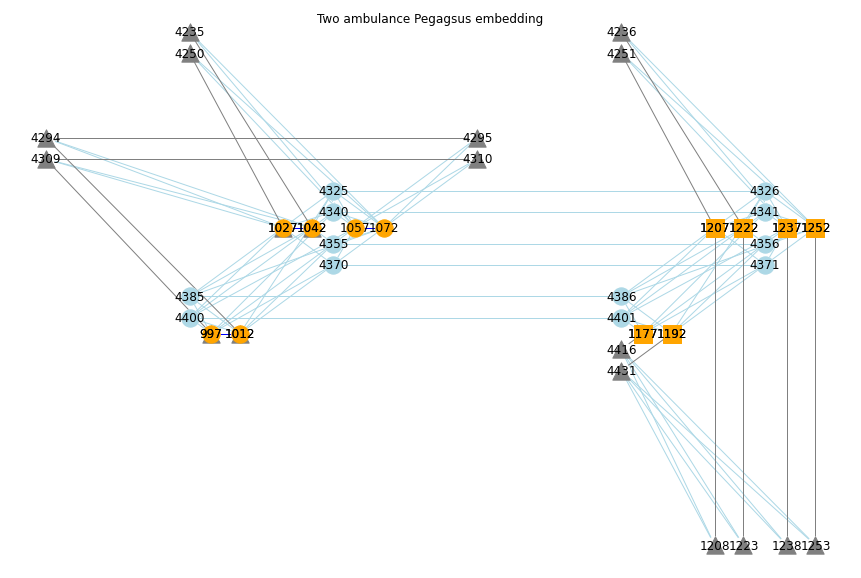

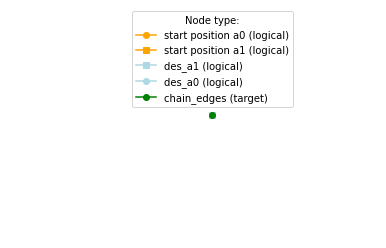

In [107]:
#DRAW a selection from the full pegasus graph show diff with pegasus topology  - EMBEDDING
import dwave_networkx as dnx
import matplotlib.pyplot as plt
################### NODES of start and destination positions of a0 and a1 ###################
# Destinations positions for A0 'lightyellow'
#nodes_66_h_a0 = [v for v in range(3363,3363+15*6,15)]

# Start positions for A0 'yellow'
#nodes_66_v_a0 = [v for v in range(692,692+15*6,15)]  

# Destinations positions for A1


# Start positions for A1
Start_first = 872

#################### SIZE of graph and remove spines ###################
plt.ion()
fig, ax = plt.subplots()
plt.suptitle("Two ambulance Pegagsus embedding")
ax. set_frame_on(False)
ax. tick_params(axis='both',labelcolor='w')
ax. tick_params(axis='both',which='both',color='white')
#start_a1_nodes.set_label('via method')  #FAILS
fig.set_figwidth(12.0)
fig.set_figheight(8.0)
#################### Draw nodes and edges of fully connected (start to des) nodes for a0 and for a1 ####################

if 1:
    #################### Draw EDGES that are in Adjacency ####################     
    #nodes_in_structure_graph  = dnx.pegasus_graph(16, node_list=nodes_in_structure    )
    #dnx.draw_pegasus(nodes_in_structure_graph, with_labels=True,crosses=True, node_color='r', edge_color='white', width=1)
    #edge_target_list+=line_ext_edges
    Adjacency_edges = dnx.pegasus_graph(16, edge_list=edge_target_list)
    dnx.draw_pegasus(Adjacency_edges, with_labels=False,crosses=True, node_color='w', edge_color='lightblue', width=1)
    
#################### Draw EDGES that create chains #################### 
if 1:
     chains_graph = dnx.pegasus_graph(16, edge_list=chain_edges)
     dnx.draw_pegasus(chains_graph,with_labels=True, crosses=True,node_shape='^', node_color='grey', edge_color='grey', width=1)    #lightred
     #dnx.draw_pegasus_embedding(Adjacency_edges,embedding,overlapped_embedding=False,show_labels=False,crosses=True) # displays logical node with their numbering, and diplay this node on one of the nodes that the embedding maps the logical node to, also colors nodes according to the chain they belong to.
     

node_size_my=20 #node_size = node_size_my,

if 1:
    
    
    ### Create graph and then draw
    # Draw destinations 
    des_a0_nodes = dnx.pegasus_graph(16,node_list=nodes_66_h_a0)
    dnx.draw_pegasus(des_a0_nodes,with_labels=True,crosses=True, node_color='lightblue', label='des_a0_nodes', edge_color='w', width=1)  
    #'r','b','w','y','g','lightblue' NOT 
    des_a1_nodes = dnx.pegasus_graph(16,node_list=nodes_66_h_a1)
    dnx.draw_pegasus(des_a1_nodes,with_labels=True, node_shape='o', crosses=True, node_color='lightblue', edge_color='w', width=1) 
    
    # Draw start nodes
    start_a0_nodes = dnx.pegasus_graph(16,node_list=nodes_66_v_a0)
    dnx.draw_pegasus(start_a0_nodes,with_labels=True, crosses=True  ,node_color='orange', edge_color='b', width=1) 
    start_a1_nodes = dnx.pegasus_graph(16,node_list=nodes_66_v_a1)
    dnx.draw_pegasus(start_a1_nodes,with_labels=True, node_shape='s', crosses=True, node_color='orange', edge_color='w', width=1)  
a2=0
if a2:
    #Experimental ambulance
    Start_first_a2 = 693 
    #start positions A1
    nodes_66_v_a2 = [v for v in range(Start_first_a2,Start_first_a2+15*6,15)]
    Start_first_a2 = 768 + 15
    nodes_66_v_a2 += [v for v in range(Start_first_a2,Start_first_a2+15*6,15)]
    Des_first_a2 = 3469+15
    nodes_66_h_a2 = [v for v in range(Des_first_a2,Des_first_a2+15*4,15)] + [v for v in range(Des_first_a2+15*3+14,Des_first_a2+15*11+14,15)]
    nodes_66_h_a2 += [753,767] 
    Des_first_a2 = 3604 + 15
    nodes_66_h_a2 += [v for v in range(Des_first_a2,Des_first_a2+15*4,15)] + [v for v in range(Des_first_a2+15*3+14,Des_first_a2+15*11+14,15)]
    #print(embedding, nodes_66_h_a2)
    start_a2_nodes = dnx.pegasus_graph(16,node_list=nodes_66_v_a2)
    des_a2_nodes = dnx.pegasus_graph(16,node_list=nodes_66_h_a2)
    dnx.draw_pegasus(start_a2_nodes,with_labels=True, crosses=True  ,node_color='red', edge_color='b', width=1)     
    dnx.draw_pegasus(des_a2_nodes,with_labels=True, crosses=True  ,node_color='grey', edge_color='b', width=1)     

##################### draw legend ####################
if 1:
    fig1, ax1 = plt.subplots()
    ax1. set_frame_on(False)
    ax1. tick_params(axis='both',labelcolor='w')
    ax1. tick_params(axis='both',which='both',color='white')
    start_a0 =plt.plot(0, 0, color='orange',  marker='o', label='start position a0 (logical)') 
    line1 =plt.plot( color='orange', marker='s', label='start position a1 (logical)') 
    start_a1 =plt.plot(0, 0, color='orange',  marker='s', label='start position a1 (logical)') 
    des_a1 = plt.plot(0, 0, color='lightblue',  marker='s', label='des_a1 (logical)') 
    des_a0 = plt.plot(0, 0, color='lightblue',  marker='o', label='des_a0 (logical)') 
    chain_edges_legend = plt.plot(0, 0, color='green',  marker='o', label='chain_edges (target)') 
    plt.legend(title='Node type:',loc='upper center') 

In [ ]:
#DRAW active part of the full pegasus graph  - EMBEDDING
import dwave_networkx as dnx
import matplotlib.pyplot as plt
def Draw_pegagsus_graph(nodes_to_draw, edges_to_draw ):
    """
    nodes_to_draw list[list(edge)]
    node_color list[color_of_each_node_group]
    edges_to_draw list[list(edge)]
    edge_color list[color_of_each_node_group]
    """
    #need *kwarg
    node_set

In [34]:
#DIAGNOSE when embedding is inconsistent with target and source edge list (or graph)
from dwave.embedding import verify_embedding, diagnose_embedding
structured_sampler = DWaveSampler(solver={'qpu': True,'topology__type': 'chimera'})#, chains=[2,3])    
graph_topology =   dnx.chimera_graph(16,16)
edge_src_list = list(graph_topology.edges)
target_edge_list = structured_sampler.edgelist
embedding_list = [(node,node)for node in  list(graph_topology.nodes)]

#diagnosis = diagnose_embedding(embedding_list, edge_src_list,target_edge_list) #WORKS
diagnosis = diagnose_embedding(embedding_list, graph_topology,target_edge_list) # also WORKS
n=0
for problem in diagnosis:
    n +=1
    if (problem[0]==dwave.embedding.exceptions.MissingEdgeError or 1) and n<10:
        print(problem)


NameError: name 'dwave' is not defined

In [ ]:
# Language to describe bits of the Chimera topology
    *
    *
 * *  * *           'shore' = width of the cross = height of the cross = 't'
    *               ''
    *    
  4-tuple Chimera index = (row of cross, col of cross, horiz pos in cross,  vert pos in cross)  

In [201]:
DWave_chimera_embedding1 ={0: (1765, 1762, 1773), 6: (1895, 1890), 13: (1635, 1644, 1636, 1763), 14: (1768, 1775, 1640), 15: (1758, 1626, 1766, 1774, 1754), 16: (1756, 1764, 1772, 1752, 1624), 17: (1629, 1645, 1637, 1634), 19: (2019, 1891, 2021, 2029), 20: (1909, 1901, 1905, 2033, 1893), 21: (1892, 1900, 1908, 1904, 2032), 22: (1896, 2024, 1902, 1894), 23: (2028, 2020, 2036, 2018), 2: (1633, 1761), 3: (1642, 1770), 4: (1643, 1771), 5: (1760, 1632, 1767), 12: (1630, 1646, 1638), 1: (1769, 1641), 7: (1897, 2025), 18: (2031, 2039, 2023), 8: (1889, 2017), 9: (1898, 2026), 10: (1899, 2027), 11: (1888, 2016)} 
offset_embedding = {}
#move original embedding up 11 crosses and left 7 crosses
offset = 11*128 + 6 * 8
for key, chain in DWave_chimera_embedding1.items():
    newchain = []
    for  val in chain:
        newchain.append(val - offset)
        if val - offset <0: print('err')
    offset_embedding[key] = tuple(newchain)
print(offset_embedding)    
embedding_RC =  {12: [997, 4309, 4310], 13: [1012, 4294, 4295], 14: [1027, 4250], 15: [1042, 4235], 16: [1057], 17: [1072], 0: [4325], 1: [4340], 2: [4355], 3: [4370], 4: [4385], 5: [4400], 18: [1177, 4416], 19: [1192, 4431], 20: [1207, 4251, 1208], 21: [1222, 4236, 1223], 22: [1237, 1238], 23: [1252, 1253], 6: [4326], 7: [4341], 8: [4356], 9: [4371], 10: [4386], 11: [4401]}

{0: (309, 306, 317), 6: (439, 434), 13: (179, 188, 180, 307), 14: (312, 319, 184), 15: (302, 170, 310, 318, 298), 16: (300, 308, 316, 296, 168), 17: (173, 189, 181, 178), 19: (563, 435, 565, 573), 20: (453, 445, 449, 577, 437), 21: (436, 444, 452, 448, 576), 22: (440, 568, 446, 438), 23: (572, 564, 580, 562), 2: (177, 305), 3: (186, 314), 4: (187, 315), 5: (304, 176, 311), 12: (174, 190, 182), 1: (313, 185), 7: (441, 569), 18: (575, 583, 567), 8: (433, 561), 9: (442, 570), 10: (443, 571), 11: (432, 560)}


In [254]:
# Structured_sampler with some 'holes' DISPLAY EMBEDDING
import dwave_networkx as dnx
############### Select topology and embedding ###############
topology = 'c'

c16 = dnx.chimera_graph(16,16)
p16 = dnx.pegasus_graph(16)
if topology == 'c':
    
    structured_sampler = DWaveSampler(solver={'qpu': True,'topology__type': 'chimera'})#, chains=[2,3])  
    graph = c16 
    embedding = DWave_chimera_embedding1
    embedding = offset_embedding
    draw_topology   =   dnx.draw_chimera
    topology_graph  =   dnx.chimera_graph
else:
    structured_sampler = DWaveSampler(solver={'qpu': True,'topology__type': 'pegasus'})#, chains=[2,3])                      
    graph = p16
    embedding = embedding_RC        # for pegagus
    draw_topology   =   dnx.draw_pegasus
    topology_graph  =   dnx.pegasus_graph
chains = [[692, 3348,3349], [707, 3348] ]
#chains = [692, 3349]
#embedding = chains


############### create list of edges a) in the embedding, and b) a subset that is not in the structured_sampler ###############

#chain_edges, chain_edges_missing   = get_chains_from_embedding( structured_sampler,list(graph.edges), embedding) #structured_sampler
chain_edges, chain_edges_missing   = get_chains_from_embedding( structured_sampler, embedding,graph) 
print(' chain_edges_missing = ', chain_edges_missing)
print('chain_edges   = ',chain_edges)
############### edges and nodes from the embedding &  Adjacency, with edges that are missing in the structured_sampler ###############
edge_target_list,node_target_list,problem_edge_missing = get_target_edges_from_logical(structured_sampler, graph,embedding,  Adjacency) #structured_sampler
#print( 'node_target_list \n', node_target_list)
print( 'edge_target_list \n', edge_target_list)#edge_target_list.append( (722,723))
############### list of nodes that are not in structured_sampler
node_target_missing = []
if 0:
    for node in nodes_not_in_sampler:
        if is_node_in_structure(node_target_list,node):
            node_target_missing.append(node)
            print(node)
print(edge_hole_list)     
#print(node_target_missing,'\n', embedding)

#node list by qubit designation  this includes the chain qubits
Feature_options = {'A0_Des':[],'A1_Des':[], 'A0_Start':[],'A1_Start':[]}
Feature_encode = {0:'A0_Des', 1:'A1_Des',2: 'A0_Start',3:'A1_Start'}
Feature_color = {0:'orange', 1:'orange',2: 'lightblue',3:'lightblue'}
Feature_shape = {0:'^', 1:'s',2: '^',3:'s'}
n_des = 6
nodes_not_first_in_chain = []
for key, chain in embedding.items():
    idx = key//n_des            # group each set of 6 logical qubits into a color
    
    for q in chain:
        if len(chain) >0 and q!=chain[0]:
            nodes_not_first_in_chain.append(q)

        Feature_options[Feature_encode[idx]].append(q)


 chain_edges_missing =  []
chain_edges   =  [(309, 317), (306, 309), (434, 439), (179, 180), (179, 307), (180, 188), (312, 319), (184, 312), (302, 310), (170, 298), (310, 318), (298, 302), (300, 308), (308, 316), (296, 300), (168, 296), (173, 181), (181, 189), (178, 181), (563, 565), (435, 563), (565, 573), (445, 453), (449, 453), (449, 577), (437, 445), (436, 444), (444, 452), (448, 452), (448, 576), (440, 568), (440, 446), (438, 446), (572, 580), (564, 572), (562, 564), (177, 305), (186, 314), (187, 315), (304, 311), (176, 304), (174, 182), (182, 190), (185, 313), (441, 569), (575, 583), (567, 575), (433, 561), (442, 570), (443, 571), (432, 560)]
edge_target_list 
 [(306, 434), (309, 307), (317, 312), (306, 310), (306, 308), (306, 178), (313, 441), (185, 190), (313, 319), (313, 318), (313, 316), (185, 189), (305, 433), (177, 182), (177, 180), (305, 310), (305, 308), (177, 181), (314, 442), (186, 190), (186, 188), (314, 319), (314, 316), (186, 189), (315, 443), (187, 190), (187, 188),

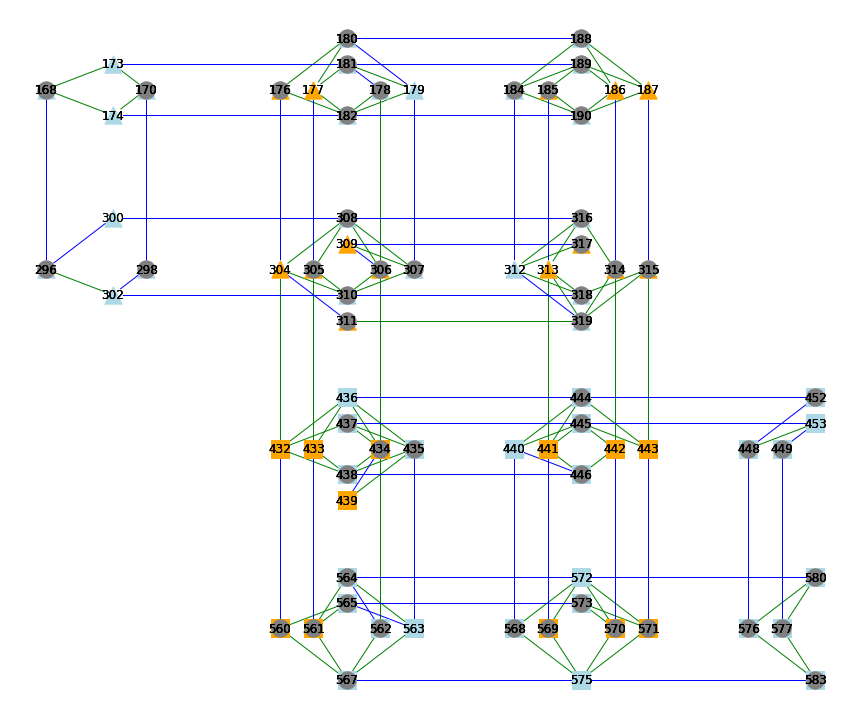

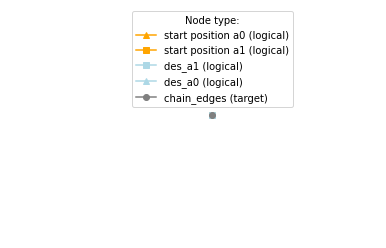

In [258]:
# DRAW problem with chains, edges, nodes, and  edges and nodes not exisiting in the QPU/ structured_sampler
# cant use  crosses=True with 
plt.ion()
fig, ax = plt.subplots()
ax. set_frame_on(False)
ax. tick_params(axis='both',labelcolor='w')
ax. tick_params(axis='both',which='both',color='white')
fig.set_figwidth(12.0)
fig.set_figheight(10.0)

#Use topology_graph & draw_topology that have previously been set to eg dnx.draw_pegasus or  dnx.draw_chimera

if topology == 'c':
       mykwargs = {}
else: mykwargs = { 'crosses':True}
mykwargs.update({ 'with_labels':True,  'edge_color':"green", 'node_color':'w'})

#draw_topology(topology_graph(16,edge_list=edge_target_list),               with_labels=True,  edge_color="green", node_color='w')
draw_topology(topology_graph(16,    edge_list=edge_target_list),    **mykwargs)
mykwargs['edge_color'] = "b"
draw_topology(topology_graph(16,    edge_list=chain_edges),         **mykwargs)
#draw_topology(topology_graph(16,edge_list=chain_edges) ,                    with_labels=True,  edge_color="blue", node_color='w')#, node_color='grey')
mykwargs['edge_color'] = "r"
draw_topology(topology_graph(16,    edge_list=chain_edges_missing + problem_edge_missing),    **mykwargs)
#draw_topology(topology_graph(16,edge_list=chain_edges_missing + problem_edge_missing), with_labels=True,edge_color="r")
if 1:
    #draw the nodes according to meaning / Feature / qubit range
    for idx in range(len(Feature_options)):
        mykwargs['edge_color'] = 'w'
        mykwargs['node_color'] = Feature_color[idx]
        mykwargs['node_shape'] = Feature_shape[idx]
        
        draw_topology(topology_graph(16,node_list=Feature_options[Feature_encode[idx]],edge_list=[]),    **mykwargs)
        #draw_topology(topology_graph(16,node_list=Feature_options[Feature_encode[idx]],edge_list=[]) ,     with_labels=True,  node_color=Feature_color[idx],node_shape=Feature_shape[idx], edge_color='w')
mykwargs['edge_color'] = 'b'
mykwargs['node_color'] = 'grey'
mykwargs['node_shape'] = 'o'
draw_topology(topology_graph(16,node_list=nodes_not_first_in_chain,edge_list=[]),    **mykwargs)      
#draw_topology(topology_graph(16,node_list=nodes_not_first_in_chain,edge_list=[]) ,              with_labels=True,  edge_color="blue", node_color='grey')#, node_color='grey')    
#draw_topology(topology_graph(16,node_list=node_target_missing) ,           with_labels=True,  node_color="r")
 
##################### draw legend ####################
if 1:
    fig1, ax1 = plt.subplots()
    ax1. set_frame_on(False)
    ax1. tick_params(axis='both',labelcolor='w')
    ax1. tick_params(axis='both',which='both',color='white')
    start_a0 =plt.plot(0, 0, color='orange',  marker='^', label='start position a0 (logical)') 
    line1 =plt.plot( color='orange', marker='s', label='start position a1 (logical)') 
    start_a1 =plt.plot(0, 0, color='orange',  marker='s', label='start position a1 (logical)') 
    des_a1 = plt.plot(0, 0, color='lightblue',  marker='s', label='des_a1 (logical)') 
    des_a0 = plt.plot(0, 0, color='lightblue',  marker='^', label='des_a0 (logical)') 
    chain_edges_legend = plt.plot(0, 0, color='grey',  marker='o', label='chain_edges (target)') 
    plt.legend(title='Node type:',loc='upper center') 


In [114]:
#node list by qubit designation
Feature_options = {'A0_Des':[],'A1_Des':[], 'A0_Start':[],'A1_Start':[]}
Feature_encode = {0:'A0_Des', 1:'A1_Des',2: 'A0_Start',3:'A1_Start'}
Feature_color = {0:'orange', 1:'orange',2: 'lightblue',3:'lightblue'}
n_des = 6
for key, chain in embedding.items():
    idx = key//n_des            # group each set of 6 qubits into a color
    for q in chain:
        Feature_options[Feature_encode[idx]].append(q)
print (Feature_options[Feature_encode[0]])
print (Feature_options[Feature_encode[1]])
print (Feature_options[Feature_encode[2]])
print (Feature_options[Feature_encode[3]])

#test = {0: [4325], 1: [4340], 2: [4355], 3: [4370], 4: [4385], 5: [4400],6: [4326], 7: [4341]]

[165, 162, 173, 33, 161, 42, 170, 43, 171, 160, 32, 167, 169, 41]
[295, 290, 297, 425, 289, 417, 298, 426, 299, 427, 288, 416]
[35, 44, 36, 163, 168, 175, 40, 158, 26, 166, 174, 154, 156, 164, 172, 152, 24, 29, 45, 37, 34, 30, 46, 38]
[419, 291, 421, 429, 309, 301, 305, 433, 293, 292, 300, 308, 304, 432, 296, 424, 302, 294, 428, 420, 436, 418, 431, 439, 423]


In [ ]:
# Supply the ACTUAL EMBEDDING and show it can be run on the QPU, 
from tabu import TabuSampler                                               
import dimod
import dwave.inspector

from dwave.system import FixedEmbeddingComposite, LazyFixedEmbeddingComposite,EmbeddingComposite
from dwave.system.samplers import DWaveSampler

#eg embedding = {12: [722], 13: [722+15*1], 14: [722+15*2],15:[722+15*3]}   #first 4 start positions
from dwave.system.samplers import DWaveSampler
structured_sampler = DWaveSampler(solver={'qpu': True,'topology__type': 'chimera'})#, chains=[2,3])                      

sampler = FixedEmbeddingComposite(structured_sampler, embedding)
Myqubo = dimod.BinaryQuadraticModel.from_qubo(Adjacency)
Num_readsMy=1
response = sampler.sample(Myqubo, return_embedding=True,num_reads=Num_readsMy)#,chain_strength=5)#,,anneal_schedule=anneal_scheduleMy,

print('OUTPUT:\n',response)
#print(response.info['embedding_context']['embedding'])
#dwave.inspector.show( response)